In [95]:
%pwd

'/Users/r/Documents/stud/ss24/finnpinn/src'

In [96]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
dir_paths = [p for p in Path("../data_out/finn_increasing_time").glob("finn_increasing_time_*") if p.is_dir()]
dir_paths

[PosixPath('../data_out/finn_increasing_time/finn_increasing_time_111'),
 PosixPath('../data_out/finn_increasing_time/finn_increasing_time_261'),
 PosixPath('../data_out/finn_increasing_time/finn_increasing_time_36'),
 PosixPath('../data_out/finn_increasing_time/finn_increasing_time_141'),
 PosixPath('../data_out/finn_increasing_time/finn_increasing_time_171'),
 PosixPath('../data_out/finn_increasing_time/finn_increasing_time_66'),
 PosixPath('../data_out/finn_increasing_time/finn_increasing_time_231'),
 PosixPath('../data_out/finn_increasing_time/finn_increasing_time_291'),
 PosixPath('../data_out/finn_increasing_time/finn_increasing_time_51'),
 PosixPath('../data_out/finn_increasing_time/finn_increasing_time_201'),
 PosixPath('../data_out/finn_increasing_time/finn_increasing_time_6'),
 PosixPath('../data_out/finn_increasing_time/finn_increasing_time_21'),
 PosixPath('../data_out/finn_increasing_time/finn_increasing_time_81')]

In [98]:
df = {
    "retardation_file_paths": [],
    "num_time_steps": [],
    "num_epochs": [],
}
for p in dir_paths:
    all_ret_file_paths = sorted((p / "predicted_retardations").glob("retPred_*.npy"), key=lambda x: int(x.stem.split("_")[-1]))
    if not all_ret_file_paths:
        continue
    df["retardation_file_paths"].append(all_ret_file_paths[-1])
    df["num_time_steps"].append(int(p.name.split("_")[-1]))
    df["num_epochs"].append(int(all_ret_file_paths[-1].stem.split("_")[-1]))
df = pd.DataFrame(df).sort_values("num_time_steps").reset_index(drop=True)
df = df[df["num_time_steps"] < 170]
df

,retardation_file_paths,num_time_steps,num_epochs
0,../data_out/finn_increasing_time/finn_increasi...,6,100
1,../data_out/finn_increasing_time/finn_increasi...,21,100
2,../data_out/finn_increasing_time/finn_increasi...,36,100
3,../data_out/finn_increasing_time/finn_increasi...,51,100
4,../data_out/finn_increasing_time/finn_increasi...,66,100
5,../data_out/finn_increasing_time/finn_increasi...,81,100
6,../data_out/finn_increasing_time/finn_increasi...,111,46
7,../data_out/finn_increasing_time/finn_increasi...,141,100


In [99]:
df2 = df.copy()
df2["ret"] = df["retardation_file_paths"].apply(lambda p: np.load(p).ravel())
df2 = df2.explode('ret').reset_index(drop=True)
df2["u"] = np.tile(np.arange(0, 100), len(df))
df2

,retardation_file_paths,num_time_steps,num_epochs,ret,u
0,../data_out/finn_increasing_time/finn_increasi...,6,100,4.283369,0
1,../data_out/finn_increasing_time/finn_increasi...,6,100,4.261923,1
2,../data_out/finn_increasing_time/finn_increasi...,6,100,4.24041,2
3,../data_out/finn_increasing_time/finn_increasi...,6,100,4.218837,3
4,../data_out/finn_increasing_time/finn_increasi...,6,100,4.197204,4
...,...,...,...,...,...
795,../data_out/finn_increasing_time/finn_increasi...,141,100,3.296222,95
796,../data_out/finn_increasing_time/finn_increasi...,141,100,3.295753,96
797,../data_out/finn_increasing_time/finn_increasi...,141,100,3.2953,97
798,../data_out/finn_increasing_time/finn_increasi...,141,100,3.294862,98


In [100]:
df2.dtypes

retardation_file_paths    object
num_time_steps             int64
num_epochs                 int64
ret                       object
u                          int64
dtype: object

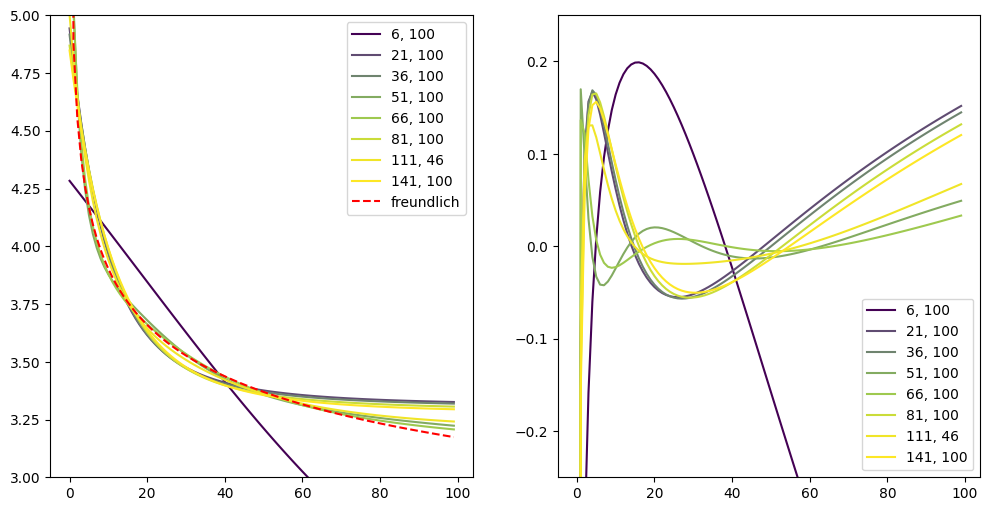

In [105]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ret_freundlich = np.load("../data_out/retardation_freundlich.npy")

initial_colors = plt.cm.viridis(np.linspace(0, 1, len(df)))
final_color = initial_colors[-1]

# highest_time_step_ret = np.load(df["retardation_file_paths"].iloc[-1])
highest_time_step_ret = ret_freundlich

for i, p in enumerate(df["retardation_file_paths"]):
    ret = np.load(p)
    mixed_color = initial_colors[i] * (1 - i / (len(df) - 1)) + final_color * (i / (len(df) - 1))
    ax1.plot(ret, label=f"{df['num_time_steps'][i]}, {df['num_epochs'][i]}", color=mixed_color)
    ax2.plot(ret-highest_time_step_ret, label=f"{df['num_time_steps'][i]}, {df['num_epochs'][i]}", color=mixed_color)
ax1.plot(ret_freundlich, "r--", label="freundlich")#, color=final_color)
ax1.set_ylim(3,5)
ax2.set_ylim(-.25,.25)
ax1.legend()
ax2.legend()
plt.show()

# FINN mit aufaddierten, gelernten Residuen

90%-Quantile (siehe `make_PI_datasets2.py`)

In [102]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

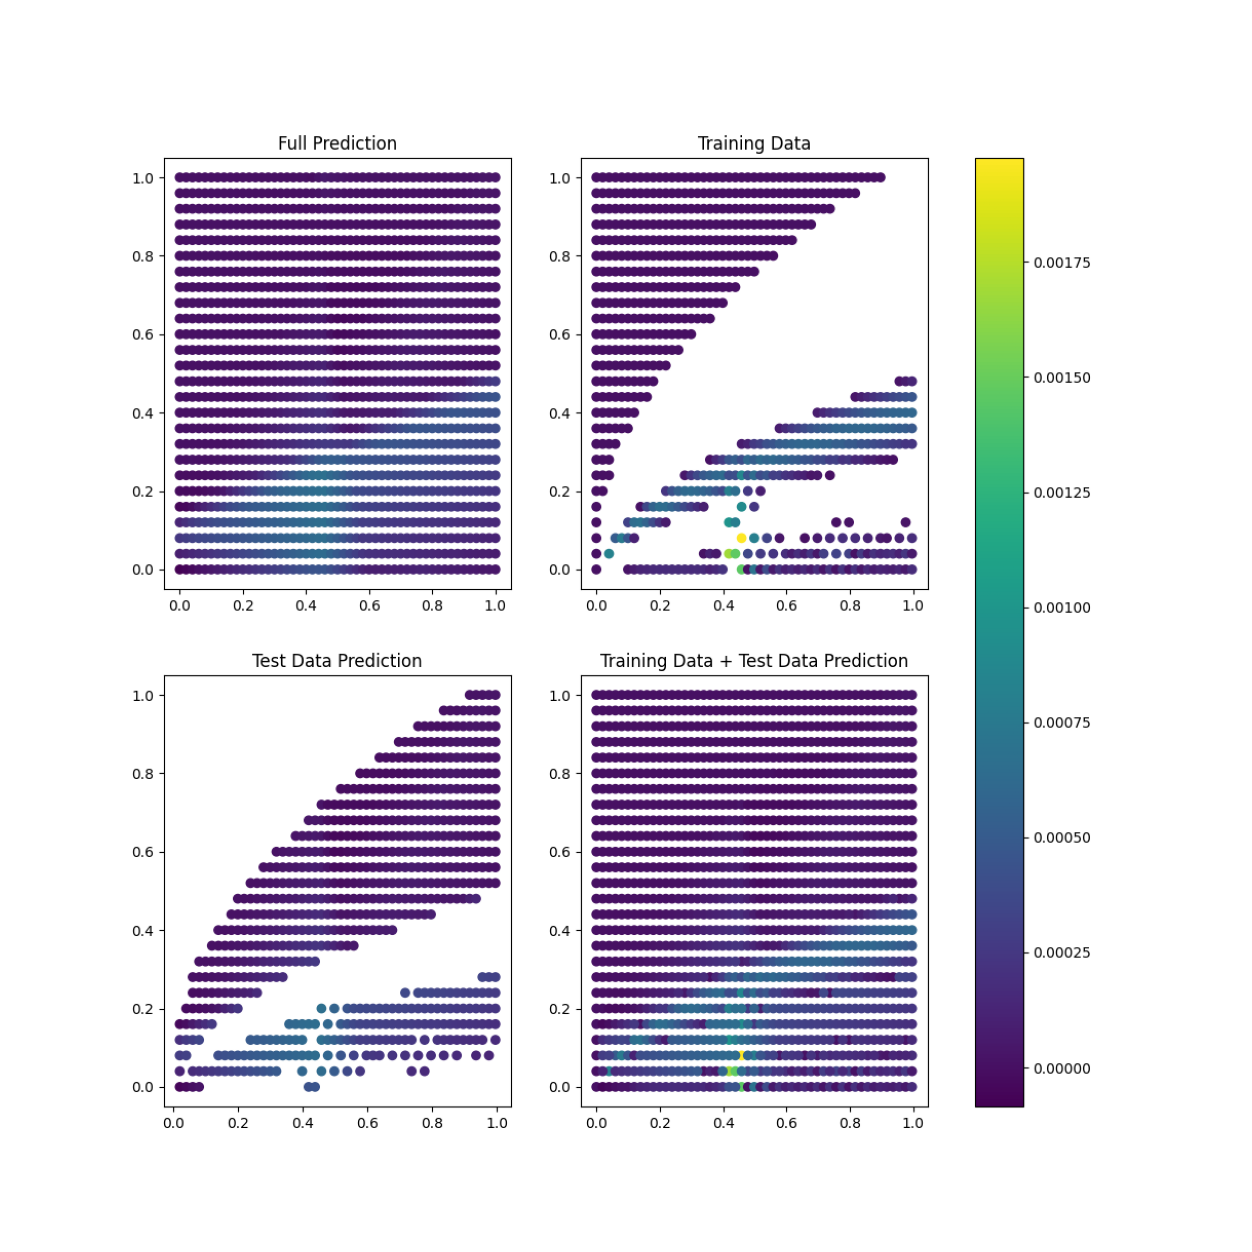

In [103]:
image_path = Path("../data_out/residual_nets_output/predictions_pos_diss.png")
if image_path.exists():
    fig, ax = plt.subplots(figsize=(20, 16))
    plt.imshow(plt.imread(image_path))
    plt.axis('off')
    plt.show()
else:
    print(f"Error: Image not found at '{image_path}'")